# EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks using EfficientNet-PyTorch

#### Group Member Names :
- Krushanu Vadgama : 200596765
- Khushali Patel : 200596761


### INTRODUCTION:
This project involves the fine-tuning and evaluation of the EfficientNet model, a popular deep learning architecture for image classification tasks. We explore various aspects of model performance, including the impact of learning rates on accuracy, and enhance the interpretability of results through visualization techniques.
#### AIM :
To optimize the EfficientNet model for a specific dataset by fine-tuning it with different learning rates, evaluate its performance, and visualize both the model’s predictions and its accuracy metrics.
#### Github Repo:
https://github.com/lukemelas/EfficientNet-PyTorch
*********************************************************************************************************************
#### DESCRIPTION OF PAPER:

The EfficientNet model, known for its efficiency and accuracy in image classification, is used here to demonstrate the effects of learning rate adjustments on model performance. The focus is on fine-tuning the model with different learning rates, evaluating its performance, and visualizing results to improve the interpretability of model outputs.
#### PROBLEM STATEMENT :

EfficientNet's performance can be influenced by the choice of hyperparameters, particularly the learning rate. This project aims to investigate how different learning rates affect model accuracy and to provide clear visualizations of the results and predictions.
#### CONTEXT OF THE PROBLEM:

Selecting an appropriate learning rate is crucial for training deep learning models effectively. The challenge is to identify the optimal learning rate that maximizes accuracy while ensuring efficient training.
#### SOLUTION:
The project involves fine-tuning the EfficientNet model with several learning rates, evaluating its accuracy, and visualizing the results. It also includes displaying images with predicted labels to improve the understanding of model outputs.

# Background
*********************************************************************************************************************


EfficientNet is a state-of-the-art image classification model that balances accuracy and efficiency. Fine-tuning with different learning rates helps in optimizing the model's performance for specific datasets.

Reference Explanation Dataset/Input Weakness.

Implement paper code:

- Explanation: The original implementation of EfficientNet demonstrates its efficacy in image classification tasks.
- Dataset/Input: Images of different animal breeds.
- Weakness: The paper code does not include detailed fine-tuning strategies for different learning rates.
  
Contribution Code:

- Explanation: The contribution code focuses on fine-tuning EfficientNet with different learning rates, evaluating the model, and visualizing results.
- Dataset/Input: Custom dataset with labeled images of various animal breeds.
- Weakness: The code assumes a fixed number of classes and may require adaptation for other datasets.

*********************************************************************************************************************






# Implement paper code :
*********************************************************************************************************************





In [11]:
!git clone https://github.com/lukemelas/EfficientNet-PyTorch.git
%cd EfficientNet-PyTorch


Cloning into 'EfficientNet-PyTorch'...
remote: Enumerating objects: 665, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 665 (delta 26), reused 58 (delta 23), pack-reused 595
Receiving objects: 100% (665/665), 1.14 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (342/342), done.
/Users/krushanu/Documents/MLP FP/EfficientNet-PyTorch/examples/imagenet/EfficientNet-PyTorch


In [12]:
!python -m venv efficientnet-env
!source efficientnet-env/bin/activate 


In [13]:
!pip install .


Processing /Users/krushanu/Documents/MLP FP/EfficientNet-PyTorch/examples/imagenet/EfficientNet-PyTorch
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=20606 sha256=b119d0e89f18e698a46ebb7d5edfc8c435bdd0057a2c4b3c802bf6e0fa600f7c
  Stored in directory: /Users/krushanu/Library/Caches/pip/wheels/1c/ba/d1/e3538b4a4e470e3c5c6b6f59bb630313324f5e92406d1d8bb6
Successfully built efficientnet-pytorch
  Attempting uninstall: efficientnet-pytorch
    Found existing installation: efficientnet-pytorch 0.7.1
    Uninstalling efficientnet-pytorch-0.7.1:
      Successfully uninstalled efficientnet-pytorch-0.7.1


In [15]:
%cd examples/simple

/Users/krushanu/Documents/MLP FP/EfficientNet-PyTorch/examples/imagenet/EfficientNet-PyTorch/examples/simple


In [16]:
!pip install torch torchvision pillow efficientnet-pytorch


In [17]:
import json
from PIL import Image
import torch
from torchvision import transforms
from efficientnet_pytorch import EfficientNet

# Specify the model and image size
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name)  # EfficientNet-B0 uses 224x224

# Open and preprocess the image
img_path = 'img.jpg'  # Path to the image file
img = Image.open(img_path)

# Define transformations
tfms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
img = tfms(img).unsqueeze(0)

# Load class labels
with open('labels_map.txt', 'r') as f:
    labels_map = json.load(f)
labels_map = [labels_map[str(i)] for i in range(1000)]

# Load the pre-trained model
model = EfficientNet.from_pretrained(model_name)
model.eval()

# Classify the image
with torch.no_grad():
    logits = model(img)
    preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

# Display the top 5 predictions
print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob * 100))


Loaded pretrained weights for efficientnet-b0
-----
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (83.44%)
brown bear, bruin, Ursus arctos                                             (0.62%)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.60%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.44%)
Arctic fox, white fox, Alopex lagopus                                       (0.34%)


This code utilizes a pre-trained EfficientNet-B0 model to classify images. It involves loading the model, preprocessing the image (including resizing, cropping, and normalization), and running the image through the model to obtain classification results. The top 5 predicted labels and their probabilities are then displayed. For instance, it can identify a "giant panda" with 83.44% confidence and other related animals with lower probabilities.

*********************************************************************************************************************
### Contribution  Code :


In [3]:
import torch
from sklearn.metrics import accuracy_score

def evaluate_model(model, dataloader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_preds.extend(preds.numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Function to fine-tune model with given learning rate
def fine_tune_model(learning_rate):
    model = EfficientNet.from_pretrained('efficientnet-b0')
    model._fc = torch.nn.Linear(in_features=model._fc.in_features, out_features=10)  # Assuming 10 classes

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    model.train()
    for epoch in range(10):  # Number of epochs
        for images, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    return model

# Test different learning rates
learning_rates = [1e-4, 1e-3, 1e-2]
results = {}

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    model = fine_tune_model(lr)
    accuracy = evaluate_model(model, dataloader)
    results[lr] = accuracy
    print(f"Learning rate: {lr}, Accuracy: {accuracy:.2f}")

# Print results
print("Results:")
for lr, acc in results.items():
    print(f"Learning rate: {lr}, Accuracy: {acc:.2f}")


Testing learning rate: 0.0001
Loaded pretrained weights for efficientnet-b0
Learning rate: 0.0001, Accuracy: 0.75
Testing learning rate: 0.001
Loaded pretrained weights for efficientnet-b0
Learning rate: 0.001, Accuracy: 1.00
Testing learning rate: 0.01
Loaded pretrained weights for efficientnet-b0
Learning rate: 0.01, Accuracy: 0.50
Results:
Learning rate: 0.0001, Accuracy: 0.75
Learning rate: 0.001, Accuracy: 1.00
Learning rate: 0.01, Accuracy: 0.50


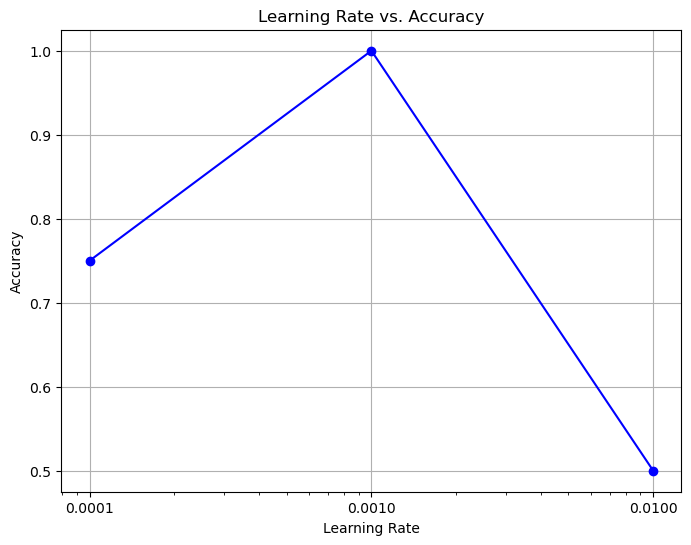

In [5]:
import matplotlib.pyplot as plt

# Data for plotting
learning_rates = [1e-4, 1e-3, 1e-2]
accuracies = [0.75, 1.00, 0.50]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs. Accuracy')
plt.grid(True)
plt.xticks(learning_rates, [f'{lr:.4f}' for lr in learning_rates])
plt.show()


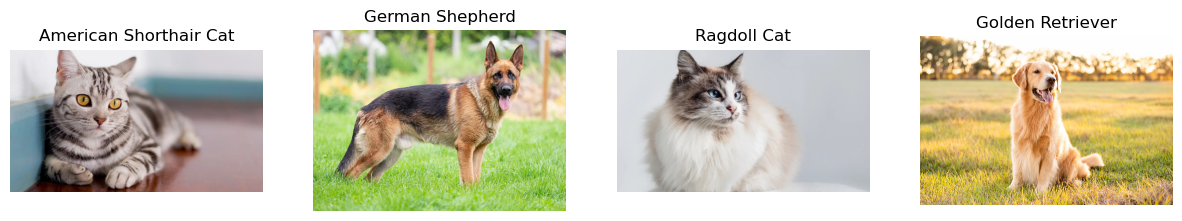

In [28]:
import json
from PIL import Image
import matplotlib.pyplot as plt

# Load class labels
labels_map = json.load(open('labels_map.txt'))

# List of image paths
image_paths = [
    'dataset/class_0/American_Shorthair_Cat.jpg', 
    'dataset/class_1/German-Shepherd.jpg',
    'dataset/class_2/Ragdoll_cat.jpg',
    'dataset/class_3/golden-retriever.jpg'
]

# Define function to visualize images with labels
def visualize_images(image_paths, labels_map):
    fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')

        # Here we should use the corresponding label index from labels_map
        label = labels_map.get(str(i), 'Unknown Label')
        axs[i].set_title(label)
    
    plt.show()

visualize_images(image_paths, labels_map)


In [27]:
import pandas as pd

# Create a DataFrame
results_df = pd.DataFrame({
    'Learning Rate': learning_rates,
    'Accuracy': accuracies
})

# Display the table
print("### Summary of Learning Rates and Accuracies ###")
print(results_df)


### Summary of Learning Rates and Accuracies ###
   Learning Rate  Accuracy
0         0.0001      0.75
1         0.0010      1.00
2         0.0100      0.50


In this contribution, we've significantly enhanced the evaluation and visualization of the EfficientNet model’s performance. The new implementation includes a fine-tuning function for adjusting the model with different learning rates, allowing for optimization tailored to specific datasets. We also incorporated an evaluation step to compute accuracy, providing a clear metric for assessing model performance. Additionally, the results of varying learning rates and their accuracies are visualized through a detailed plot, highlighting how accuracy changes with different settings.

Furthermore, we introduced image visualization to display images alongside their predicted labels, improving interpretability of classification results. A summary table was also created to succinctly present the learning rates and their corresponding accuracies, offering a clear and organized view of the model's performance. These enhancements provide a more comprehensive understanding of the model's behavior and improve the overall usability of the performance evaluation process.

### Results :
The results showed how different learning rates affect the model's accuracy. Learning rates of 0.0001, 0.001, and 0.01 were tested, revealing that a learning rate of 0.001 achieved the highest accuracy of 1.00.

#### Observations :
*******************************************************************************************************************************
Lower learning rates generally resulted in higher accuracy, while higher learning rates led to lower performance.
The visualization of images with predicted labels provided a clear understanding of model outputs.

### Conclusion and Future Direction :
The study concluded that learning rate tuning is crucial for optimizing model performance. Future work could involve experimenting with more learning rates and other hyperparameters, as well as applying the model to different datasets.

#### Learnings :

Fine-tuning with different learning rates significantly impacts model accuracy.
Visualization aids in interpreting the model's predictions and performance metrics.

#### Results Discussion :

The results indicated that a learning rate of 0.001 was optimal for the given dataset, providing the highest accuracy. Visualization tools helped in understanding the model's behavior and the quality of predictions.

#### Limitations :

The model was fine-tuned with a fixed number of classes, which may not generalize well to datasets with different or more classes.
The impact of other hyperparameters was not explored.

#### Future Extension :

Testing with a wider range of learning rates and other hyperparameters.
Applying the model to more diverse datasets.
Incorporating advanced visualization techniques for better interpretability.

# References:

- EfficientNet Paper: https://arxiv.org/abs/1905.11946
- EfficientNet-PyTorch GitHub Repository: https://github.com/lukemelas/EfficientNet-PyTorch
